In [1]:
import os
import pandas as pd
import seaborn as sns

import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Mask for United Airlines

In [2]:
flights = wrangle.pull_airline_data('AA')

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [3]:
flights.OP_CARRIER.value_counts()

AA    1050420
Name: OP_CARRIER, dtype: int64

In [4]:
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,AA,2,LAX,JFK,35.0,0.0,0.0,0.0,0.0,35.0
1,2009-01-01,AA,16,SFO,JFK,83.0,0.0,0.0,0.0,0.0,83.0
2,2009-01-01,AA,75,IAD,LAX,35.0,0.0,0.0,0.0,7.0,42.0
3,2009-01-01,AA,76,LAX,IAD,15.0,0.0,0.0,0.0,0.0,15.0
4,2009-01-01,AA,85,JFK,SFO,26.0,0.0,0.0,0.0,16.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...
1050415,2019-12-31,AA,1357,MIA,JFK,38.0,0.0,0.0,0.0,41.0,79.0
1050416,2019-12-31,AA,1358,DFW,SAT,51.0,0.0,0.0,0.0,0.0,51.0
1050417,2019-12-31,AA,1368,MIA,LAS,0.0,54.0,0.0,0.0,0.0,54.0
1050418,2019-12-31,AA,1376,DFW,EYW,0.0,0.0,0.0,0.0,24.0,24.0


In [5]:
flights[flights['ORIGIN']=='IAH']

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
236,2009-01-02,AA,1294,IAH,MIA,0.0,0.0,1.0,0.0,33.0,34.0
356,2009-01-03,AA,511,IAH,DFW,1.0,0.0,0.0,0.0,48.0,49.0
537,2009-01-04,AA,450,IAH,DFW,346.0,0.0,0.0,0.0,0.0,346.0
762,2009-01-05,AA,426,IAH,DFW,0.0,0.0,0.0,0.0,96.0,96.0
771,2009-01-05,AA,450,IAH,DFW,0.0,0.0,31.0,0.0,0.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...
1049788,2019-12-29,AA,2630,IAH,DFW,0.0,0.0,0.0,0.0,65.0,65.0
1050089,2019-12-30,AA,1224,IAH,ORD,20.0,0.0,0.0,0.0,0.0,20.0
1050275,2019-12-31,AA,1614,IAH,MIA,180.0,0.0,6.0,0.0,0.0,186.0
1050338,2019-12-31,AA,1224,IAH,ORD,0.0,0.0,59.0,0.0,0.0,59.0


In [6]:
df = wrangle.clean_flight_data_for_average_daily_delay(flights)

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:103: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_monthly_mean = flights.resample('M').mean().total_delays
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:109: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:124: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future versi

In [7]:
col_to_sum = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


In [8]:
top_15_hubs = ['ATL',
'DFW',
'DEN',
'ORD',
'LAX',
'JFK',
'IAH',
'PHX',
'EWR',
'SFO',
'SEA',
'IAD',
'PHL',
'CLT',
'MIA']

In [9]:
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,AA,2,LAX,JFK,35.0,0.0,0.0,0.0,0.0,35.0
1,2009-01-01,AA,16,SFO,JFK,83.0,0.0,0.0,0.0,0.0,83.0
2,2009-01-01,AA,75,IAD,LAX,35.0,0.0,0.0,0.0,7.0,42.0
3,2009-01-01,AA,76,LAX,IAD,15.0,0.0,0.0,0.0,0.0,15.0
4,2009-01-01,AA,85,JFK,SFO,26.0,0.0,0.0,0.0,16.0,42.0


 ### Data Types, Shape

In [10]:
flights.shape

(1050420, 11)

In [11]:
# seeing all my data types
flights.dtypes


FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAFT_DELAY           float64
row_sums                      float64
dtype: object

In [12]:
# shows the categories for all the columns 
for col in df:
    print(df[col].value_counts())

81.069730    31
84.610587    31
47.000000     4
55.000000     3
47.351351     2
             ..
45.840149     1
46.744409     1
48.161538     1
41.753521     1
62.432773     1
Name: average_delay, Length: 3936, dtype: int64


In [13]:
df.head()

,average_delay
FL_DATE,
2009-01-01,58.260274
2009-01-02,65.522222
2009-01-03,66.687151
2009-01-04,50.191589
2009-01-05,69.574074


## Statistical Summary

In [14]:
flights.describe()

,OP_CARRIER_FL_NUM,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
count,1.050420e+06,1.050420e+06,1.050420e+06,1.050420e+06,1.050420e+06,1.050420e+06,1.050420e+06
mean,1.366506e+03,2.038221e+01,3.469107e+00,1.379847e+01,8.749262e-02,1.996278e+01,5.770006e+01
std,7.705379e+02,4.677443e+01,2.048360e+01,2.546653e+01,2.628331e+00,4.220195e+01,6.427904e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01
25%,6.630000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01
50%,1.395000e+03,4.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01
75%,1.990000e+03,2.400000e+01,0.000000e+00,1.800000e+01,0.000000e+00,2.400000e+01,6.900000e+01
max,2.949000e+03,2.142000e+03,1.587000e+03,1.138000e+03,9.870000e+02,1.514000e+03,2.142000e+03


In [15]:
list_of_airports = flights['ORIGIN'].value_counts()
list_of_airports = pd.DataFrame(list_of_airports)
list_of_airports.nunique()

ORIGIN    15
dtype: int64

In [16]:
list_of_airports.head(15)

,ORIGIN
DFW,383029
ORD,148995
MIA,126564
CLT,89035
LAX,69633
PHX,49937
PHL,48832
JFK,35101
SFO,28341
DEN,15886


## Spitting the data

In [17]:
# Split the data
train = df.loc[:'2016'] 
test = df.loc['2016':] 


In [18]:
train

,average_delay
FL_DATE,
2009-01-01,58.260274
2009-01-02,65.522222
2009-01-03,66.687151
2009-01-04,50.191589
2009-01-05,69.574074
...,...
2016-12-27,53.210031
2016-12-28,53.423611
2016-12-29,46.773026


In [19]:
flights.set_index('FL_DATE')

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,AA,2,LAX,JFK,35.0,0.0,0.0,0.0,0.0,35.0
2009-01-01,AA,16,SFO,JFK,83.0,0.0,0.0,0.0,0.0,83.0
2009-01-01,AA,75,IAD,LAX,35.0,0.0,0.0,0.0,7.0,42.0
2009-01-01,AA,76,LAX,IAD,15.0,0.0,0.0,0.0,0.0,15.0
2009-01-01,AA,85,JFK,SFO,26.0,0.0,0.0,0.0,16.0,42.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-31,AA,1357,MIA,JFK,38.0,0.0,0.0,0.0,41.0,79.0
2019-12-31,AA,1358,DFW,SAT,51.0,0.0,0.0,0.0,0.0,51.0
2019-12-31,AA,1368,MIA,LAS,0.0,54.0,0.0,0.0,0.0,54.0


In [20]:
# Split the data
train_fl = flights.set_index('FL_DATE').loc[:'2016'] 
test_fl = flights.set_index('FL_DATE').loc['2016':] 
train_fl.loc['2009-09-30':]

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-09-30,AA,3,JFK,LAX,35.0,0.0,0.0,0.0,0.0,35.0
2009-09-30,AA,5,DFW,HNL,33.0,0.0,0.0,0.0,0.0,33.0
2009-09-30,AA,18,SFO,JFK,0.0,0.0,19.0,0.0,32.0,51.0
2009-09-30,AA,21,JFK,LAX,31.0,0.0,0.0,0.0,0.0,31.0
2009-09-30,AA,75,IAD,LAX,0.0,0.0,20.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,AA,2597,LAX,AUS,0.0,0.0,0.0,0.0,15.0,15.0
2016-12-31,AA,2603,DFW,EGE,105.0,0.0,4.0,0.0,0.0,109.0
2016-12-31,AA,2648,SFO,MIA,31.0,0.0,10.0,0.0,0.0,41.0


In [21]:
train_fl

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,AA,2,LAX,JFK,35.0,0.0,0.0,0.0,0.0,35.0
2009-01-01,AA,16,SFO,JFK,83.0,0.0,0.0,0.0,0.0,83.0
2009-01-01,AA,75,IAD,LAX,35.0,0.0,0.0,0.0,7.0,42.0
2009-01-01,AA,76,LAX,IAD,15.0,0.0,0.0,0.0,0.0,15.0
2009-01-01,AA,85,JFK,SFO,26.0,0.0,0.0,0.0,16.0,42.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,AA,2597,LAX,AUS,0.0,0.0,0.0,0.0,15.0,15.0
2016-12-31,AA,2603,DFW,EGE,105.0,0.0,4.0,0.0,0.0,109.0
2016-12-31,AA,2648,SFO,MIA,31.0,0.0,10.0,0.0,0.0,41.0


In [22]:
train_fl.tail(50)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2016-12-31,AA,1837,PHL,STT,17.0,0.0,0.0,0.0,0.0,17.0
2016-12-31,AA,1883,PHL,MCO,0.0,0.0,17.0,0.0,6.0,23.0
2016-12-31,AA,1888,PHL,BOS,24.0,0.0,0.0,0.0,33.0,57.0
2016-12-31,AA,1985,PHX,PHL,3.0,0.0,19.0,0.0,0.0,22.0
2016-12-31,AA,1994,ORD,PHL,22.0,0.0,3.0,0.0,0.0,25.0
2016-12-31,AA,1663,PHL,BOS,0.0,0.0,0.0,0.0,43.0,43.0
2016-12-31,AA,1673,CLT,IAH,0.0,0.0,19.0,0.0,0.0,19.0
2016-12-31,AA,1676,PHL,SEA,0.0,0.0,21.0,0.0,0.0,21.0
2016-12-31,AA,1680,PHL,PBI,0.0,0.0,0.0,42.0,69.0,111.0


In [23]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

In [24]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

## Sum of Delay Grouped by Date

In [25]:
# Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,5711.0,249.0,791.0,0.0,1755.0
2009-01-02,4897.0,113.0,2854.0,0.0,3930.0
2009-01-03,5910.0,411.0,2202.0,0.0,3414.0
2009-01-04,6456.0,103.0,1831.0,0.0,2351.0
2009-01-05,5450.0,8713.0,7372.0,0.0,16035.0
...,...,...,...,...,...
2016-12-27,6412.0,0.0,3432.0,0.0,7130.0
2016-12-28,6067.0,0.0,2858.0,0.0,6461.0
2016-12-29,5027.0,102.0,4310.0,48.0,4732.0


In [26]:
pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].sum())

,row_sums
FL_DATE,
2009-01-01,8506.0
2009-01-02,11794.0
2009-01-03,11937.0
2009-01-04,10741.0
2009-01-05,37570.0
...,...
2016-12-27,16974.0
2016-12-28,15386.0
2016-12-29,14219.0


## Max Sum values grouped by Date

In [27]:
# Max values of Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum().max()

CARRIER_DELAY          37330.0
WEATHER_DELAY          21365.0
NAS_DELAY              21512.0
SECURITY_DELAY          2688.0
LATE_AIRCRAFT_DELAY    37982.0
dtype: float64

## Mean values grouped by Mean

In [28]:
# Mean values grouped by Date
mean_group = train_fl.groupby('FL_DATE')[col_to_sum].mean()
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,39.116438,1.705479,5.417808,0.000000,12.020548
2009-01-02,27.205556,0.627778,15.855556,0.000000,21.833333
2009-01-03,33.016760,2.296089,12.301676,0.000000,19.072626
2009-01-04,30.168224,0.481308,8.556075,0.000000,10.985981
2009-01-05,10.092593,16.135185,13.651852,0.000000,29.694444
...,...,...,...,...,...
2016-12-27,20.100313,0.000000,10.758621,0.000000,22.351097
2016-12-28,21.065972,0.000000,9.923611,0.000000,22.434028
2016-12-29,16.536184,0.335526,14.177632,0.157895,15.565789


In [29]:
mean_row_grp = pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].mean())
mean_row_grp

,row_sums
FL_DATE,
2009-01-01,58.260274
2009-01-02,65.522222
2009-01-03,66.687151
2009-01-04,50.191589
2009-01-05,69.574074
...,...
2016-12-27,53.210031
2016-12-28,53.423611
2016-12-29,46.773026


# Monthly Averages by Month

In [30]:
sorted_mean_group = mean_group.mean().sort_values(ascending=False)
sorted_mean_group

CARRIER_DELAY          21.416777
LATE_AIRCRAFT_DELAY    16.612059
NAS_DELAY              12.351762
WEATHER_DELAY           2.752500
SECURITY_DELAY          0.070562
dtype: float64

In [31]:
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,39.116438,1.705479,5.417808,0.000000,12.020548
2009-01-02,27.205556,0.627778,15.855556,0.000000,21.833333
2009-01-03,33.016760,2.296089,12.301676,0.000000,19.072626
2009-01-04,30.168224,0.481308,8.556075,0.000000,10.985981
2009-01-05,10.092593,16.135185,13.651852,0.000000,29.694444
...,...,...,...,...,...
2016-12-27,20.100313,0.000000,10.758621,0.000000,22.351097
2016-12-28,21.065972,0.000000,9.923611,0.000000,22.434028
2016-12-29,16.536184,0.335526,14.177632,0.157895,15.565789


In [32]:
mean_group.groupby(mean_group.index.month).mean()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
1,22.282203,2.875842,10.633727,0.102814,14.503802
2,21.298511,3.165046,12.638676,0.030202,14.364124
3,21.075933,1.892916,12.653517,0.052498,16.812271
4,21.200008,2.662564,13.207315,0.039201,17.600708
5,20.166762,4.160633,14.068388,0.038099,18.515134
6,21.029038,4.157673,13.270269,0.048584,20.857046
7,20.802273,2.965408,12.652127,0.046966,19.764425
8,22.244557,3.234548,12.015699,0.097746,17.738283
9,23.120811,2.216745,11.912878,0.060932,14.760749


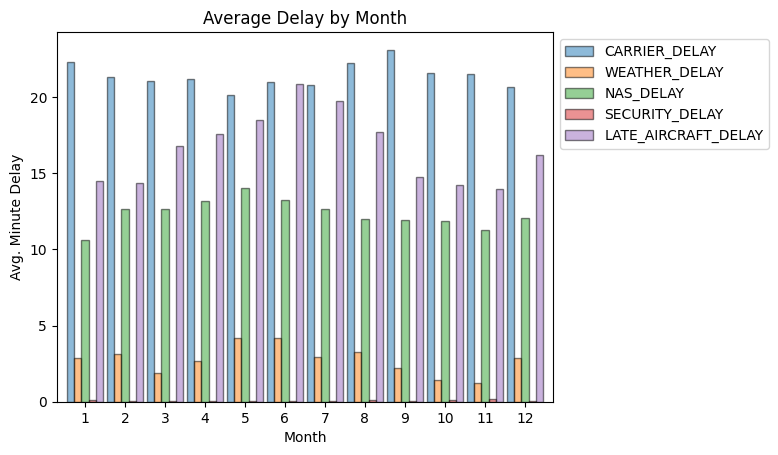

In [33]:
ax = mean_group.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black', alpha=0.5)
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.legend(title_fontsize='small', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

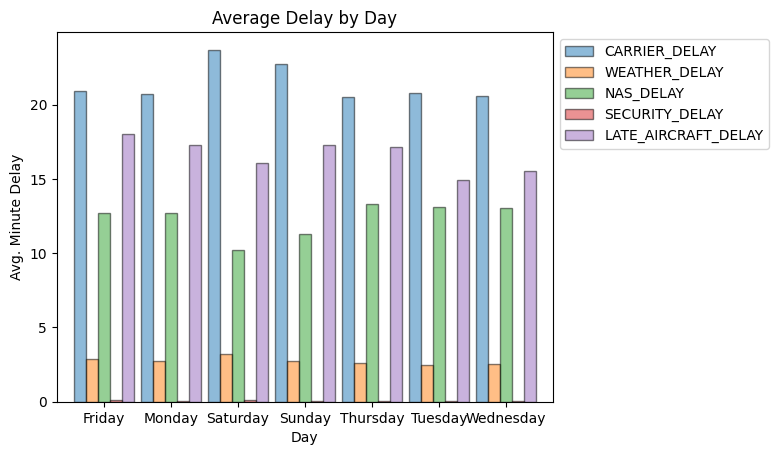

In [34]:
ax = mean_group.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black', alpha=0.5)
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.legend(title_fontsize='small', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

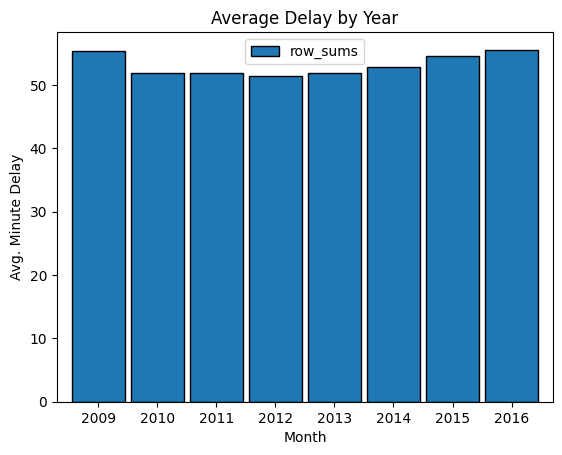

In [35]:
ax = mean_row_grp.groupby(mean_group.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Year', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

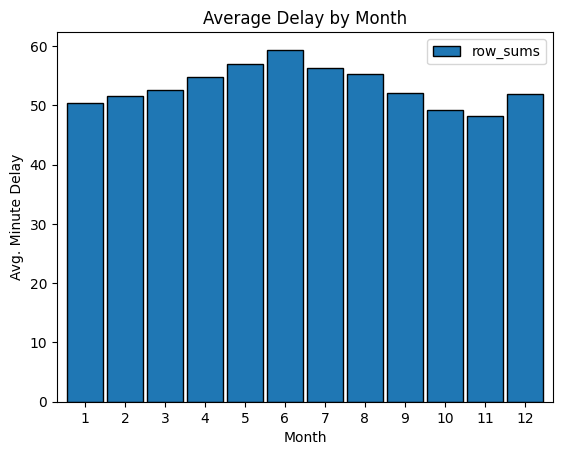

In [36]:
ax = mean_row_grp.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

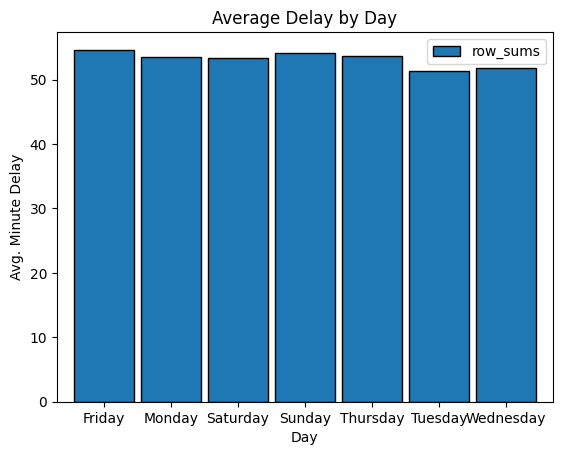

In [37]:
ax = mean_row_grp.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.show()

### Maximim Delay per Delay type

In [38]:
# Max mean value grouped by Date
train_fl.groupby('FL_DATE')[col_to_sum].mean().max()

CARRIER_DELAY          89.951807
WEATHER_DELAY          49.686047
NAS_DELAY              57.554517
SECURITY_DELAY         16.139535
LATE_AIRCRAFT_DELAY    58.293522
dtype: float64

## Sum values grouped by Origin

In [39]:
flights.groupby('ORIGIN')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,256293.0,37739.0,233644.0,909.0,413275.0
CLT,1580163.0,253124.0,1272238.0,20449.0,1720500.0
DEN,309009.0,35715.0,249979.0,610.0,448856.0
DFW,8056879.0,1604847.0,4108224.0,10014.0,7441172.0
EWR,178169.0,33298.0,204741.0,906.0,385638.0
IAD,143641.0,19380.0,104404.0,473.0,141130.0
IAH,200896.0,43458.0,141967.0,337.0,364832.0
JFK,761893.0,148699.0,823102.0,7595.0,564140.0
LAX,1531925.0,39542.0,1096635.0,9910.0,1308141.0


In [40]:
pd.DataFrame(flights.groupby('ORIGIN')['row_sums'].sum())

,row_sums
ORIGIN,
ATL,941860.0
CLT,4846474.0
DEN,1044169.0
DFW,21221136.0
EWR,802752.0
IAD,409028.0
IAH,751490.0
JFK,2305429.0
LAX,3986153.0


## Mean values grouped by Origin

In [41]:
origin_group = train_fl.groupby('ORIGIN')[col_to_sum].mean()
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,17.052493,2.465151,14.732011,0.059525,30.330654
CLT,18.791509,3.352577,15.211656,0.235808,16.183926
DEN,17.686359,2.392102,15.422208,0.016703,27.782246
DFW,20.981392,4.281241,10.737224,0.027050,18.285340
EWR,15.957045,2.595774,17.895760,0.071219,31.811529
IAD,22.334353,3.121941,17.090253,0.092002,21.724650
IAH,16.357385,3.173759,12.634135,0.029140,32.624268
JFK,22.530604,4.686093,22.646879,0.252779,15.063777
LAX,20.136599,0.701852,16.639498,0.146981,17.188090


In [42]:
origin_row_grp = pd.DataFrame(train_fl.groupby('ORIGIN')['row_sums'].mean())
origin_row_grp = origin_row_grp.sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
EWR,68.331328
JFK,65.180132
IAH,64.818686
ATL,64.639834
IAD,64.363199
SFO,63.947781
DEN,63.299619
SEA,60.206692
PHL,59.002601


In [43]:
origin_row_grp.index

Index(['EWR', 'JFK', 'IAH', 'ATL', 'IAD', 'SFO', 'DEN', 'SEA', 'PHL', 'ORD',
       'MIA', 'PHX', 'LAX', 'DFW', 'CLT'],
      dtype='object', name='ORIGIN')

In [44]:
origin_group.sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)


,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
IAH,16.357385,3.173759,12.634135,0.029140,32.624268
EWR,15.957045,2.595774,17.895760,0.071219,31.811529
ATL,17.052493,2.465151,14.732011,0.059525,30.330654
SFO,20.905523,0.684369,12.970907,0.034714,29.352268
DEN,17.686359,2.392102,15.422208,0.016703,27.782246
IAD,22.334353,3.121941,17.090253,0.092002,21.724650
SEA,22.477531,1.641218,14.766127,0.048925,21.272892
ORD,16.381278,5.054583,15.168972,0.022238,20.356955
PHL,20.740923,1.823500,17.364955,0.124474,18.948749


In [45]:
origin_row_grp.row_sums

ORIGIN
EWR    68.331328
JFK    65.180132
IAH    64.818686
ATL    64.639834
IAD    64.363199
SFO    63.947781
DEN    63.299619
SEA    60.206692
PHL    59.002601
ORD    56.984026
MIA    55.982386
PHX    55.183887
LAX    54.813019
DFW    54.312246
CLT    53.775477
Name: row_sums, dtype: float64

In [46]:
[pos for pos in list(range(len(origin_row_grp)))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [47]:
[ht for ht in origin_row_grp.row_sums]

[68.33132782985868,
 65.18013245033113,
 64.81868640148011,
 64.63983423332915,
 64.3631993006993,
 63.947781065088755,
 63.29961851737293,
 60.206692437786906,
 59.00260128403808,
 56.98402613003465,
 55.98238636981017,
 55.183886781981315,
 54.81301936159079,
 54.31224629090779,
 53.775476501754625]

In [48]:
list_of_airports

,ORIGIN
DFW,383029
ORD,148995
MIA,126564
CLT,89035
LAX,69633
PHX,49937
PHL,48832
JFK,35101
SFO,28341
DEN,15886


In [49]:
sorted_list = list_of_airports.sort_values(by='ORIGIN', ascending=False)
sorted_list = list_of_airports.index.to_list()
sorted_list

['DFW',
 'ORD',
 'MIA',
 'CLT',
 'LAX',
 'PHX',
 'PHL',
 'JFK',
 'SFO',
 'DEN',
 'ATL',
 'SEA',
 'EWR',
 'IAH',
 'IAD']

In [50]:
airport_count = pd.DataFrame(train_fl.ORIGIN.value_counts())
airport_count = airport_count.reindex(sorted_list)
airport_count

,ORIGIN
DFW,278370
ORD,100727
MIA,92031
CLT,29066
LAX,47775
PHX,21622
PHL,18068
JFK,24915
SFO,20280
DEN,9699


In [51]:
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,17.052493,2.465151,14.732011,0.059525,30.330654
CLT,18.791509,3.352577,15.211656,0.235808,16.183926
DEN,17.686359,2.392102,15.422208,0.016703,27.782246
DFW,20.981392,4.281241,10.737224,0.027050,18.285340
EWR,15.957045,2.595774,17.895760,0.071219,31.811529
IAD,22.334353,3.121941,17.090253,0.092002,21.724650
IAH,16.357385,3.173759,12.634135,0.029140,32.624268
JFK,22.530604,4.686093,22.646879,0.252779,15.063777
LAX,20.136599,0.701852,16.639498,0.146981,17.188090


### Bar Plot of Airports Delay Times

In [52]:
pd.DataFrame(sorted_data)

NameError: name 'sorted_data' is not defined

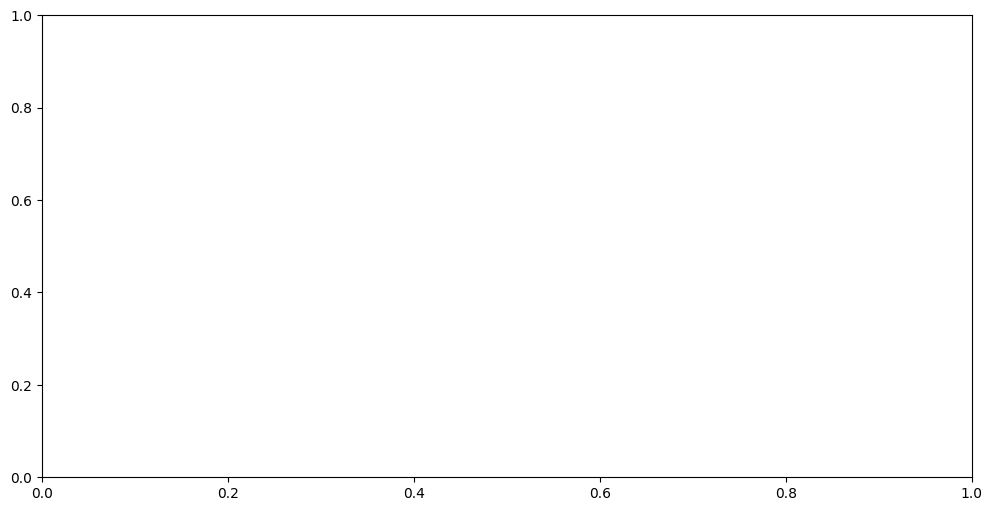

In [53]:
import numpy as np

# Create a sample DataFrame with 12 x-ticks, each containing 5 bars
data = pd.DataFrame(np.random.rand(12, 5), columns=["Bar1", "Bar2", "Bar3", "Bar4", "Bar5"])

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15  # Adjust the width of the bars as needed

x = np.arange(len(data))

# Sort the data within each x-tick group from largest to smallest
sorted_data = data.apply(lambda x: x.sort_values(ascending=False).values, axis=1)

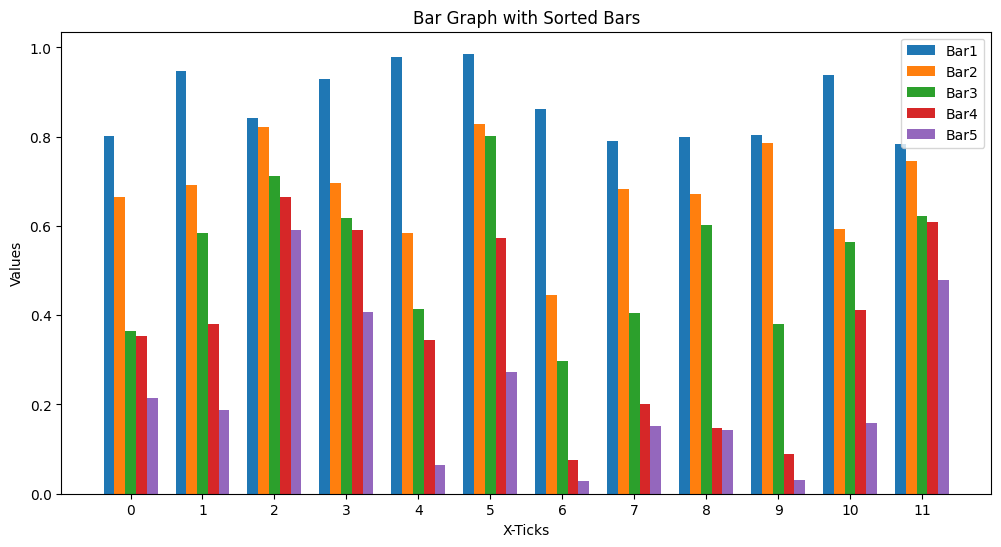

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a sample DataFrame with 12 x-ticks, each containing 5 bars
data = pd.DataFrame(np.random.rand(12, 5), columns=["Bar1", "Bar2", "Bar3", "Bar4", "Bar5"])

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15  # Adjust the width of the bars as needed

x = np.arange(len(data))

# Sort the data within each x-tick group from largest to smallest
sorted_data = data.apply(lambda x: x.sort_values(ascending=False).values, axis=1)

sorted_data = pd.DataFrame(sorted_data.tolist(), columns=["SortedBar1", "SortedBar2", "SortedBar3", "SortedBar4", "SortedBar5"])


# Plot the bars
for i in range(len(sorted_data.columns)):
    ax.bar(x + i * width, sorted_data.iloc[:, i], width, label=f'Bar{i+1}')

# Set the x-tick labels
ax.set_xticks(x + width * ((len(sorted_data.columns) - 1) / 2))
ax.set_xticklabels(data.index)

# Add labels and legend
ax.set_xlabel("X-Ticks")
ax.set_ylabel("Values")
ax.set_title("Bar Graph with Sorted Bars")
ax.legend()

plt.show()


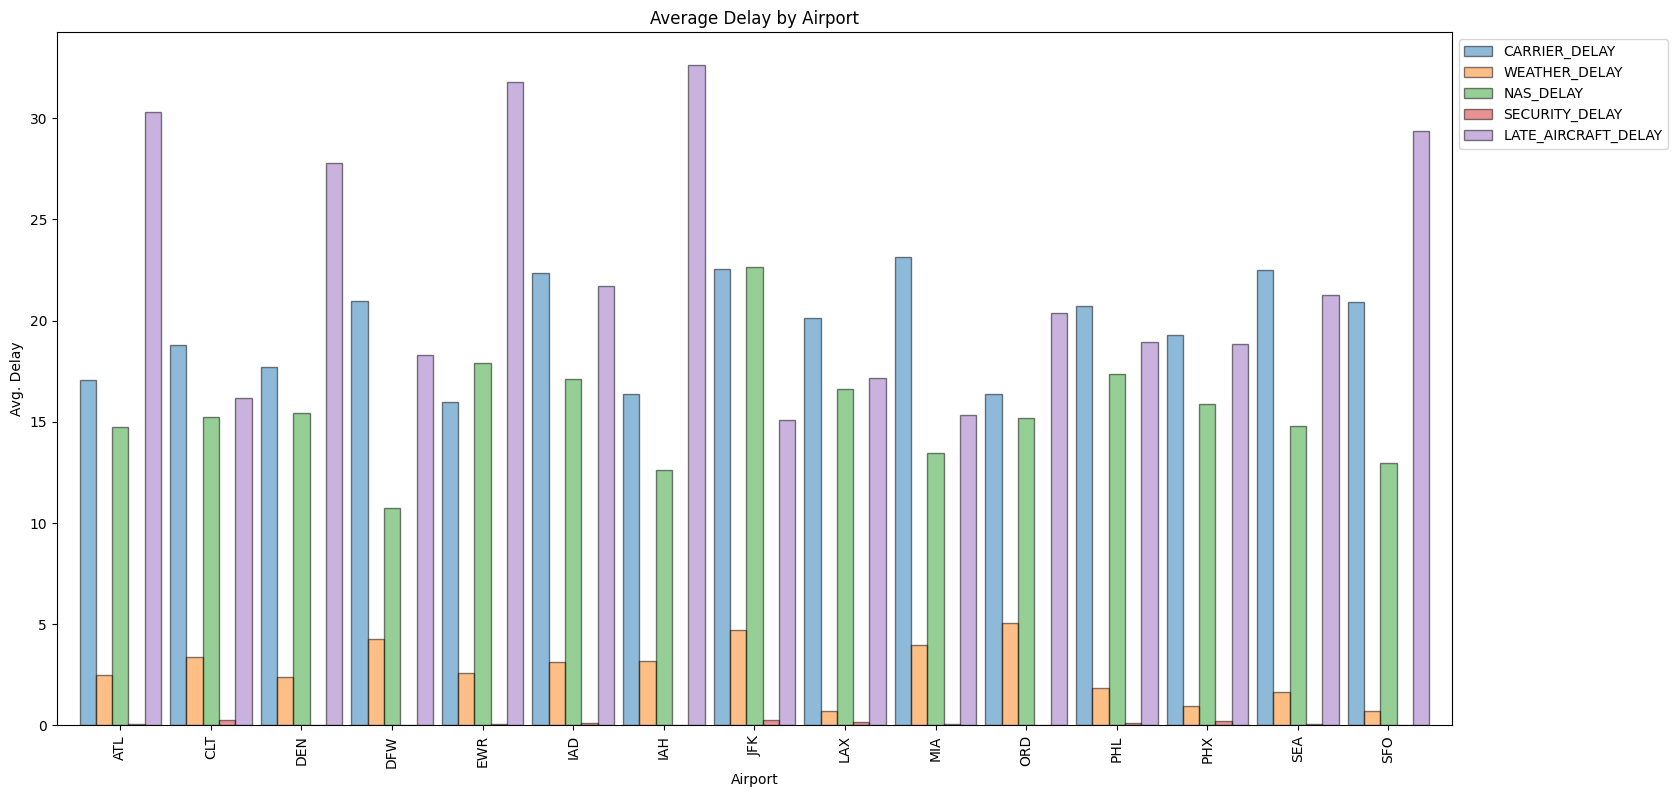

In [55]:
# Create the bar plot
ax = origin_group.plot.bar(width=0.9, ec='black', alpha=.5, figsize=(18, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

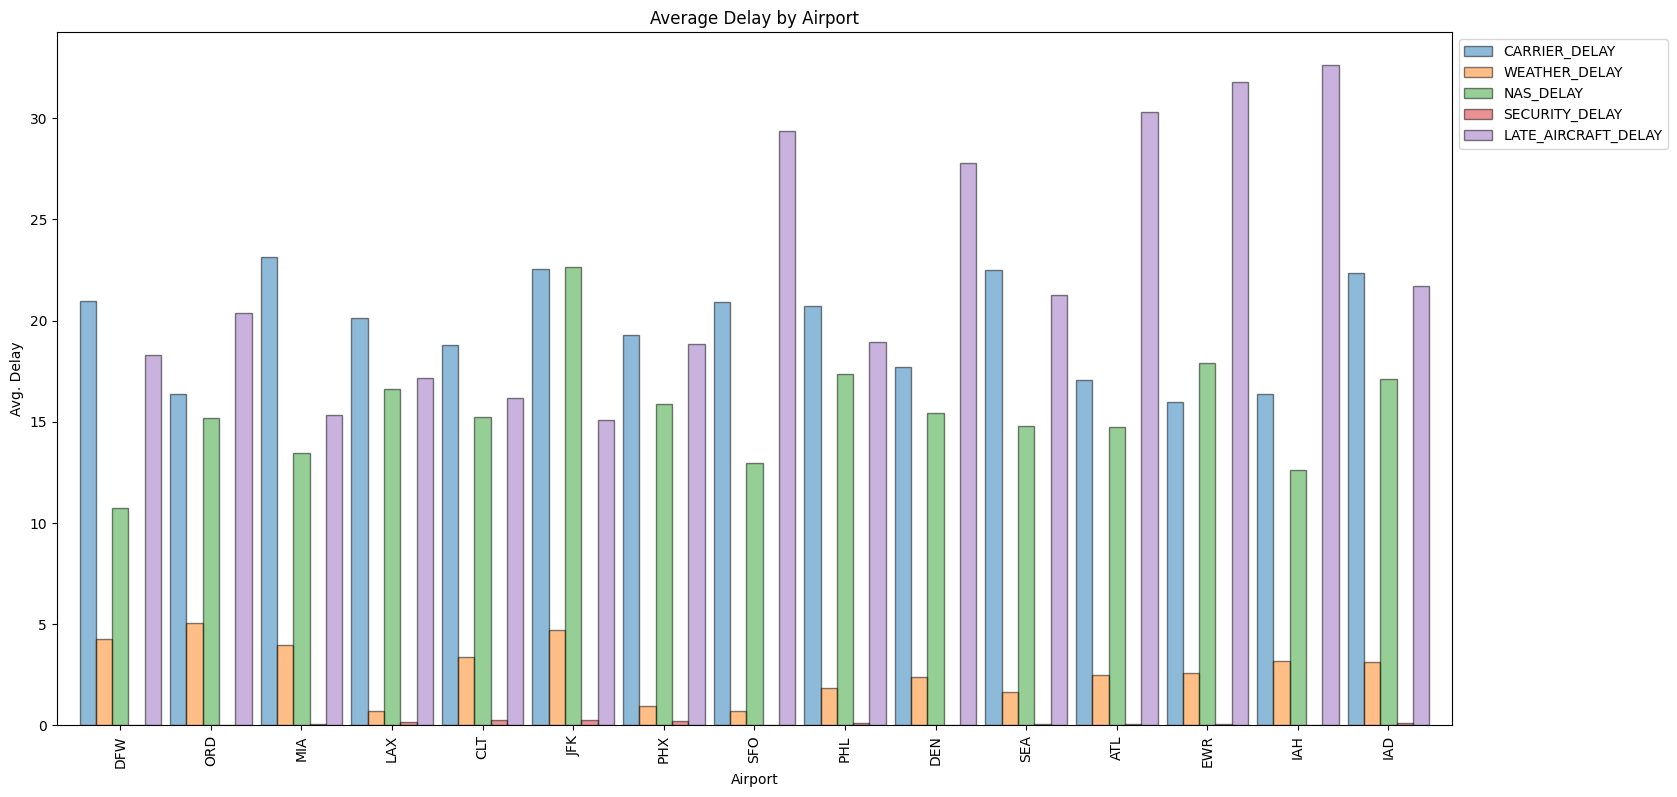

In [56]:
# Create the bar plot
ax = origin_group.reindex(airport_count.sort_values(by='ORIGIN', ascending=False).index).plot.bar(width=0.9, ec='black', alpha=.5, figsize=(18, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

### Bar Plot of Sorted Airports Average Delay Time

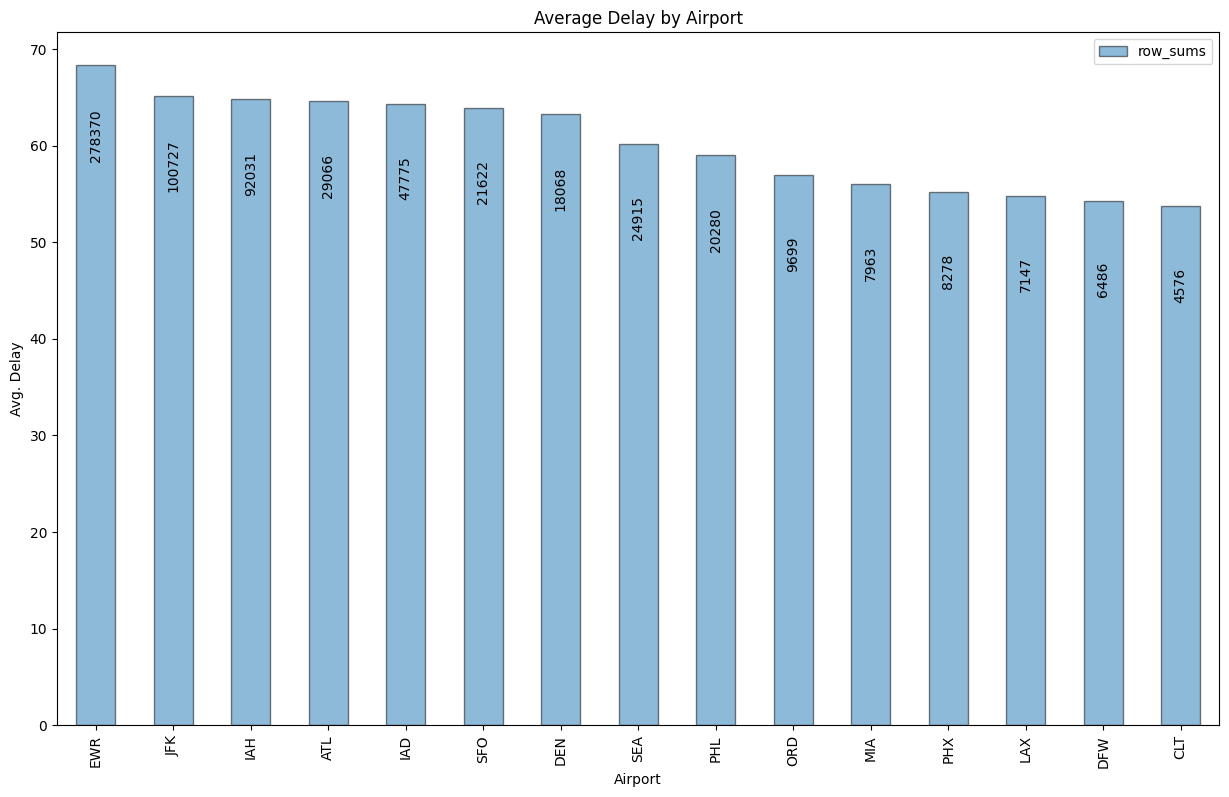

In [57]:

# Create the bar plot
ax = origin_row_grp.plot.bar(width=0.5, ec='black', alpha=.5, figsize=(15, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

# Get the heights and positions for text labels
ht_list = [ht for ht in origin_row_grp.row_sums]
pos_list = list(range(len(origin_row_grp)))
airport_val_list = [val for val in airport_count.ORIGIN]


# Loop through the data and add text labels inside the existing plot
for ht, pos, val in zip(ht_list, pos_list, airport_val_list):
    ax.text(pos, ht-10, val, fontsize=10, ha='center', va='bottom', rotation=90)  # Adjust ha and va as needed

# Show the plot
plt.show()


### Null Hypothesis:
The average delay in each airport are all the same.

### Alternative Hypothesis:
The average delay in each airport are not all the same.

### Is the mean at each airport equal or is there something causing  a difference?
### Anova Test

In [58]:
airport_count

,ORIGIN
DFW,278370
ORD,100727
MIA,92031
CLT,29066
LAX,47775
PHX,21622
PHL,18068
JFK,24915
SFO,20280
DEN,9699


In [59]:
airport_val_list

[278370,
 100727,
 92031,
 29066,
 47775,
 21622,
 18068,
 24915,
 20280,
 9699,
 7963,
 8278,
 7147,
 6486,
 4576]

In [60]:
train.groupby([train.index.year, train.index.month]).mean()

average_delay
FL_DATE FL_DATE               
2009    1            54.181061
        2            52.575071
        3            54.641746
        4            60.476777
        5            54.514335
...                        ...
2016    8            61.903066
        9            53.551901
        10           49.814191
        11           48.171387
        12           53.411468

[96 rows x 1 columns]

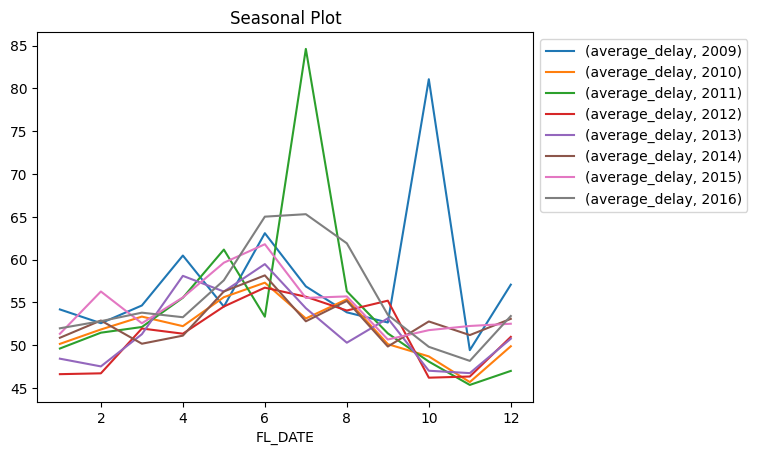

In [61]:
# .unstack turns an index level into columns
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

In [62]:
train


,average_delay
FL_DATE,
2009-01-01,58.260274
2009-01-02,65.522222
2009-01-03,66.687151
2009-01-04,50.191589
2009-01-05,69.574074
...,...
2016-12-27,53.210031
2016-12-28,53.423611
2016-12-29,46.773026


<Axes: xlabel='weekday', ylabel='average_delay'>

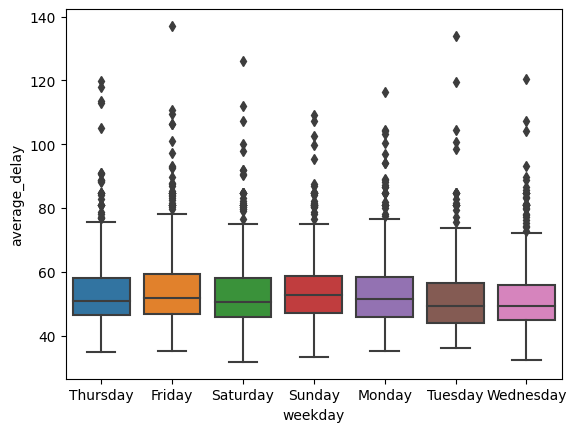

In [63]:
(
    train.reset_index()
    .assign(weekday=lambda train: train.FL_DATE.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='weekday')
)

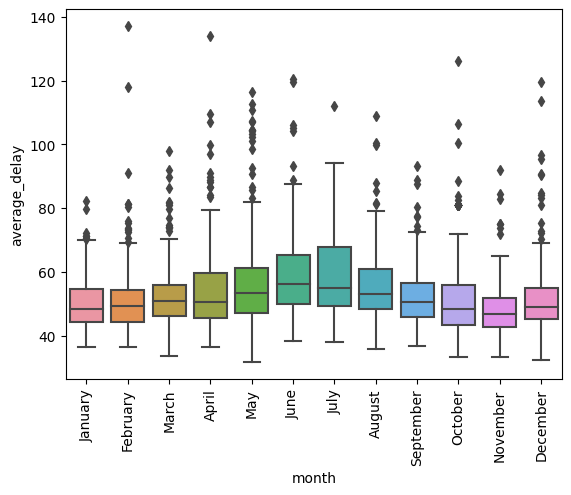

In [64]:
(
    train.reset_index()
    .assign(month=lambda train: train.FL_DATE.dt.month_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='month')
)
plt.xticks(rotation=90)
plt.show()

In [65]:
train_fl.groupby([train_fl.index.year, train_fl.index.month])[col_to_sum].mean()

CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
FL_DATE FL_DATE                                                            
2009    1            20.034889       6.512720  14.209623        0.029946   
        2            22.356989       1.555577  16.708881        0.009606   
        3            22.050625       2.225901  16.461221        0.013981   
        4            19.847852       3.411104  19.236484        0.001586   
        5            18.873135       3.497711  18.220499        0.022892   
...                        ...            ...        ...             ...   
2016    8            21.901692       4.416496  14.503138        0.241711   
        9            21.170376       2.705704  15.657303        0.097166   
        10           20.135921       0.519545  14.051433        0.129475   
        11           18.132113       0.622254  14.764085        0.142817   
        12           20.755286       2.633908  13.435787        0.109338   

                 LATE_AIRCRAFT_DELAY  
FL_DATE FL_DATE                       
2009    1                  15.594854  
        2                  13.240541  
        3                  15.886534  
        4                  21.932584  
        5                  16.742726  
...                              ...  
2016    8                  23.497476  
        9                  15.792047  
        10                 15.058291  
        11                 14.813380  
        12                 21.165818  

[94 rows x 5 columns]

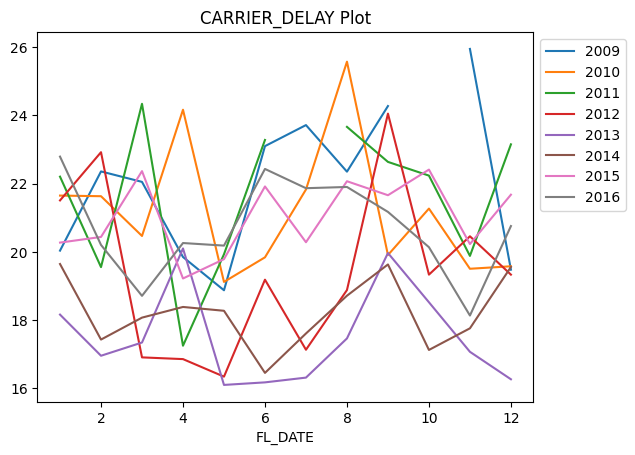

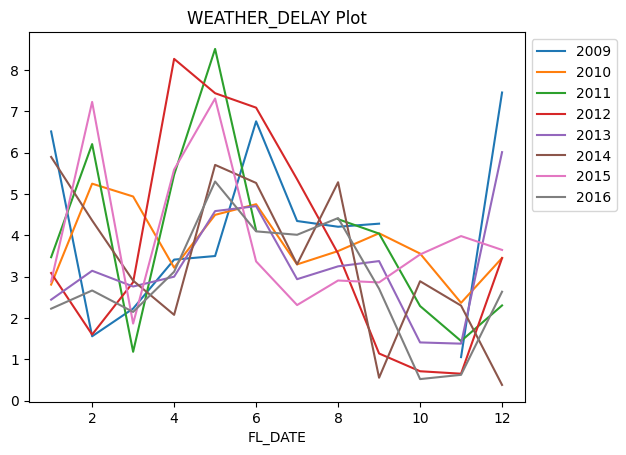

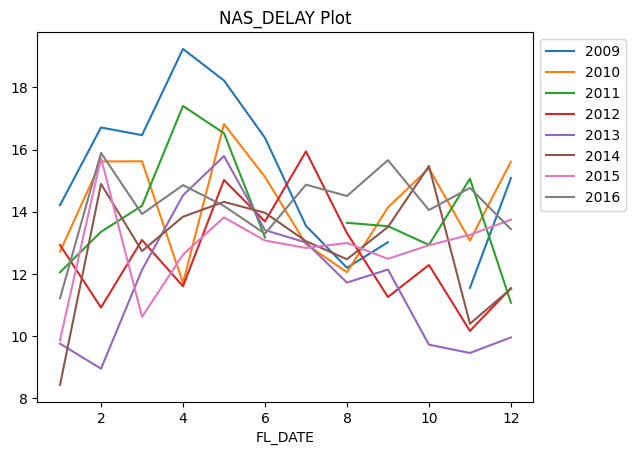

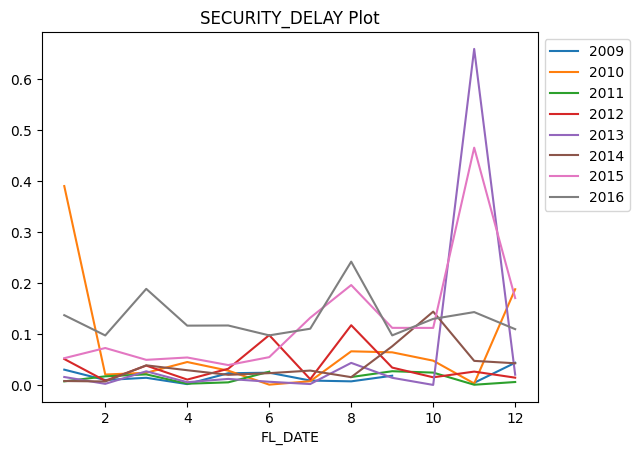

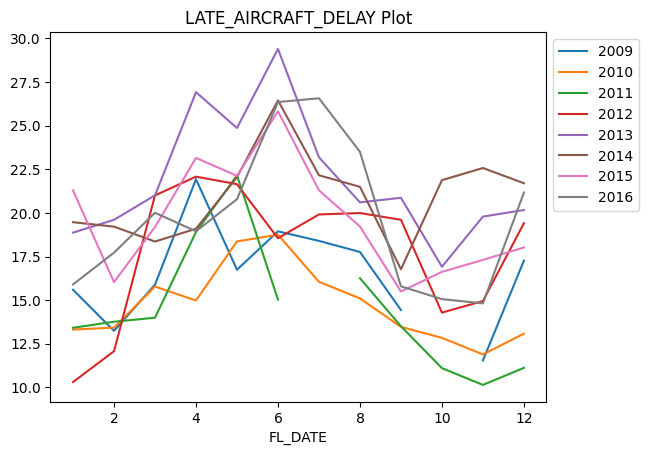

In [66]:
for col in col_to_sum:
    train_fl.groupby([train_fl.index.year, train_fl.index.month])[col].mean().unstack(0).plot(title=f'{col} Plot')
    plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
    plt.show()

### A look at histograms

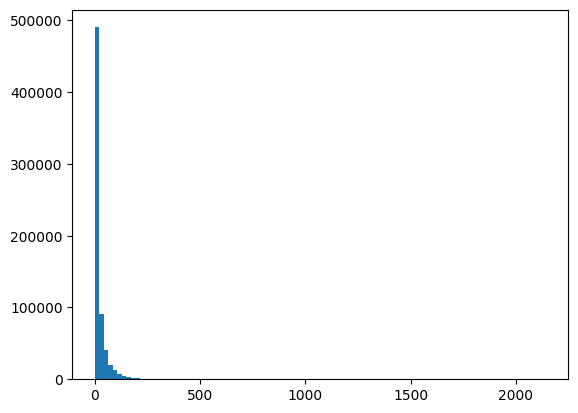

In [67]:
plt.hist(train_fl.CARRIER_DELAY, bins=100)
plt.show()

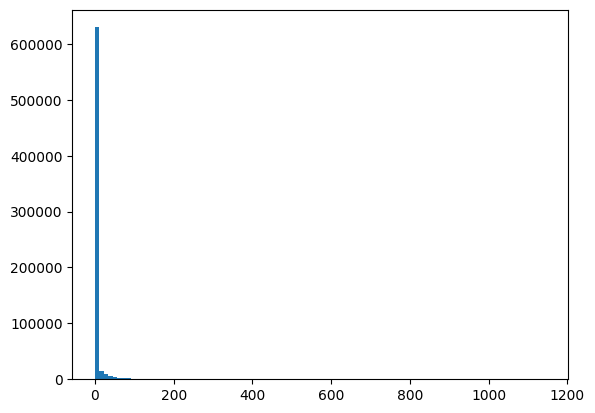

In [68]:
plt.hist(train_fl.WEATHER_DELAY, bins=100)
plt.show()

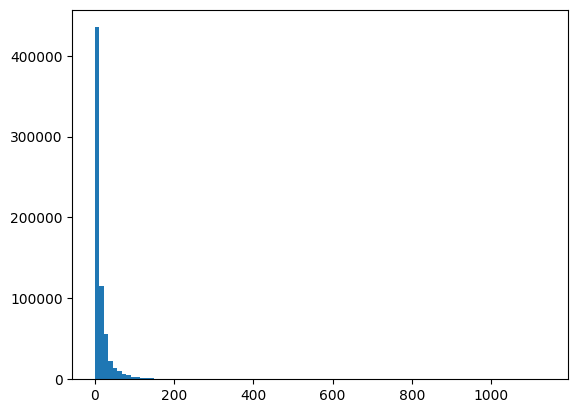

In [69]:
plt.hist(train_fl.NAS_DELAY, bins=100)
plt.show()

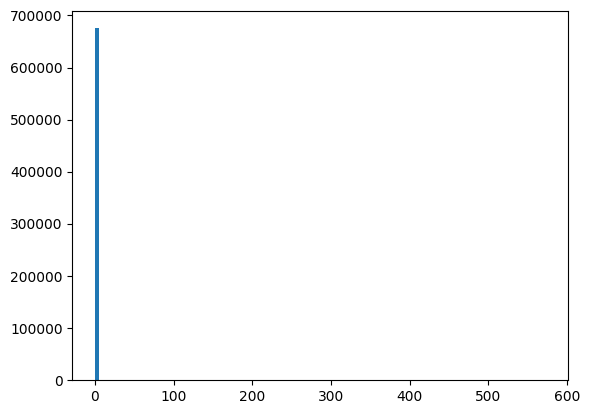

In [70]:
plt.hist(train_fl.SECURITY_DELAY, bins=100)
plt.show()

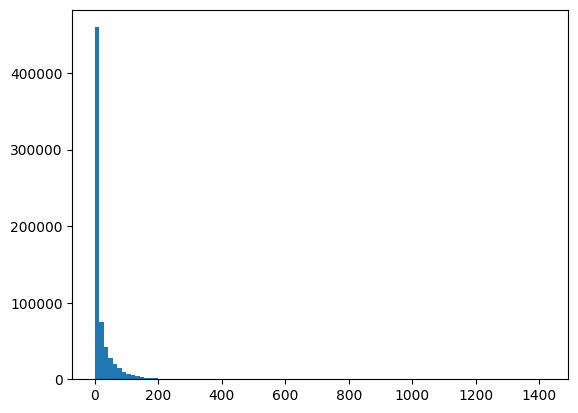

In [71]:
plt.hist(train_fl.LATE_AIRCRAFT_DELAY, bins=100)
plt.show()

### Find the best interval to define average delay by to optimize reducing noise while keeping good correlation results

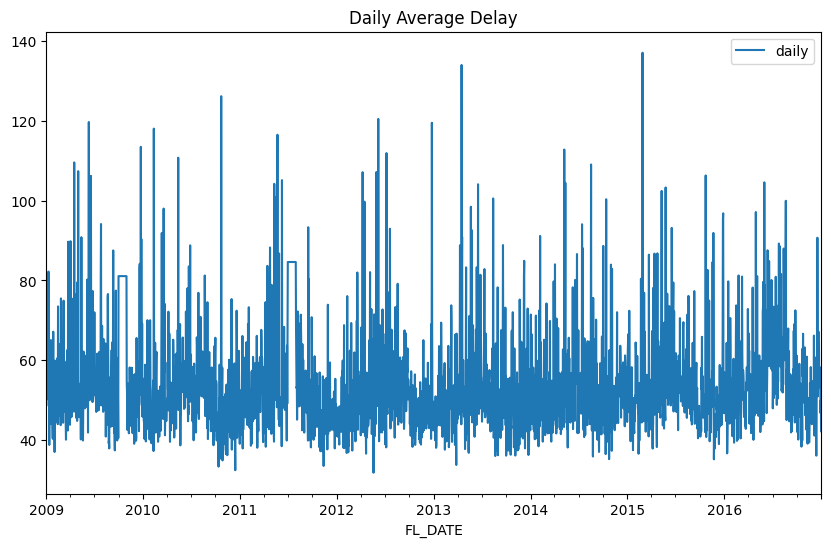

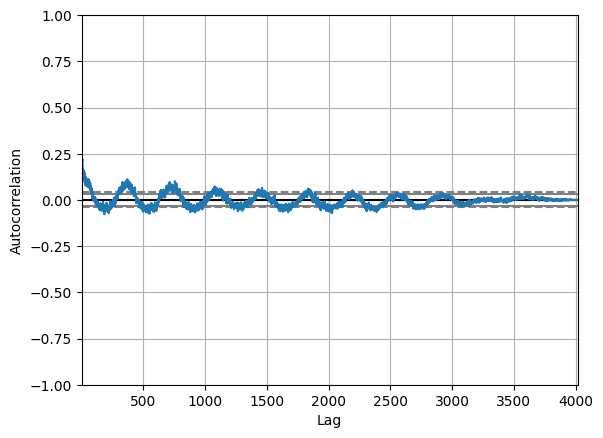

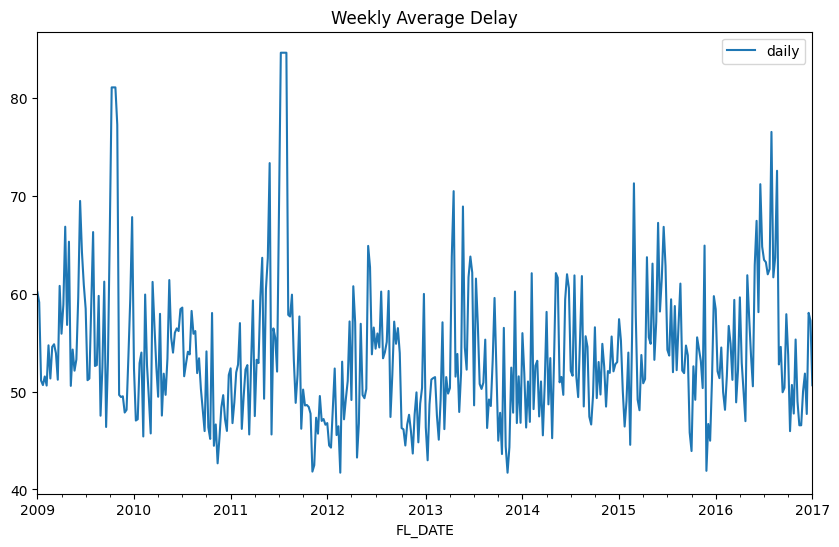

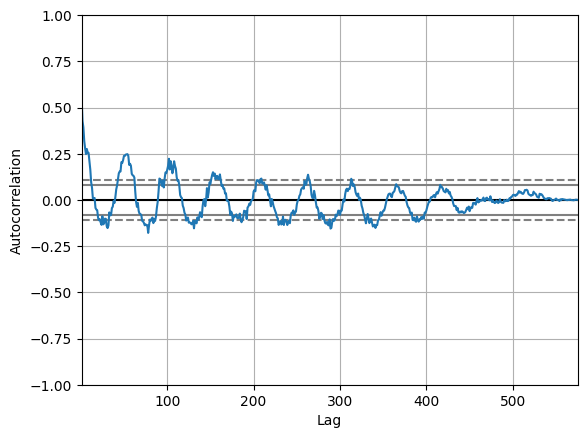

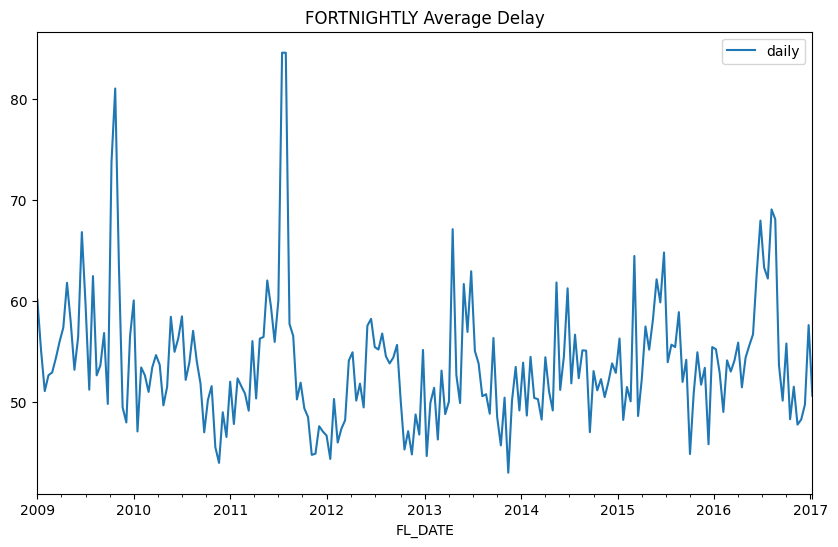

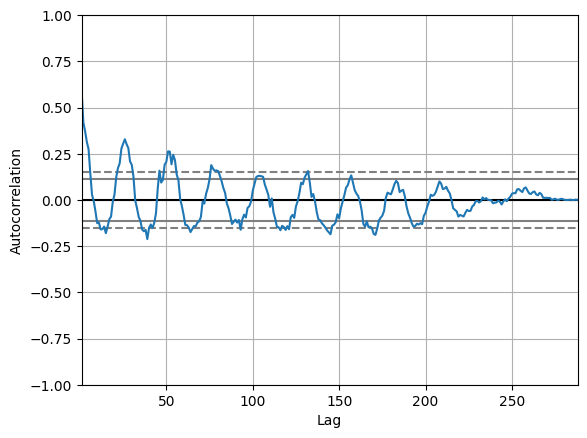

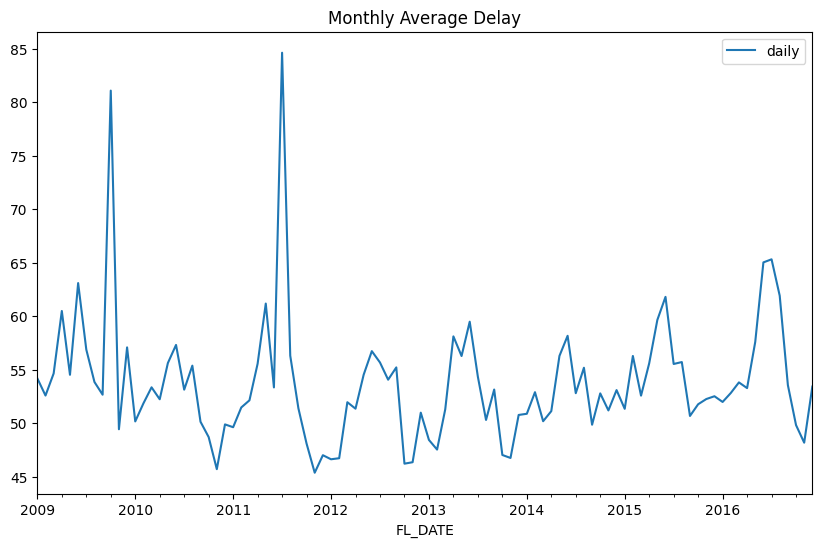

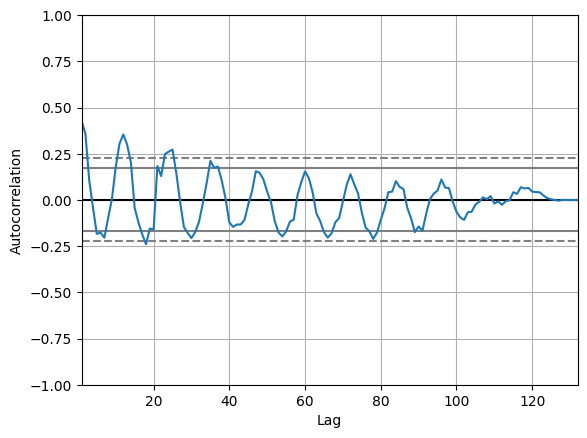

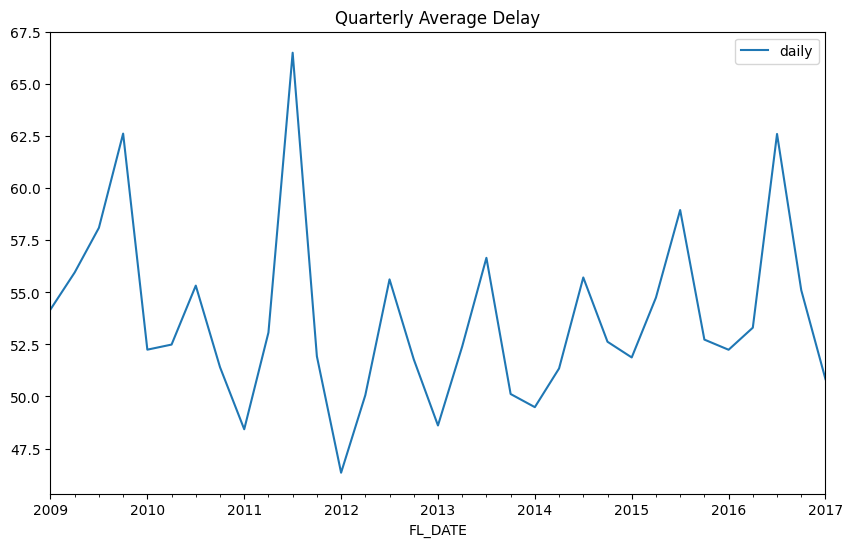

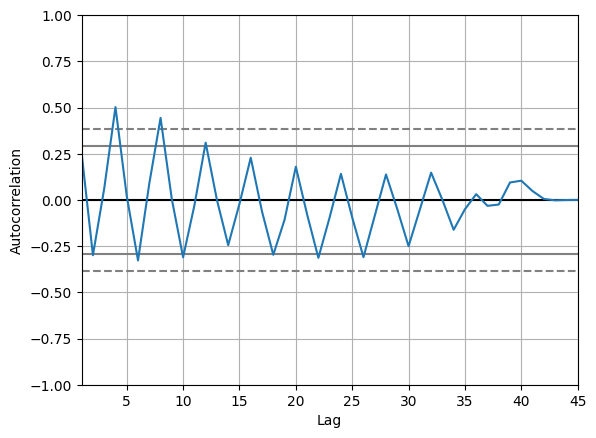

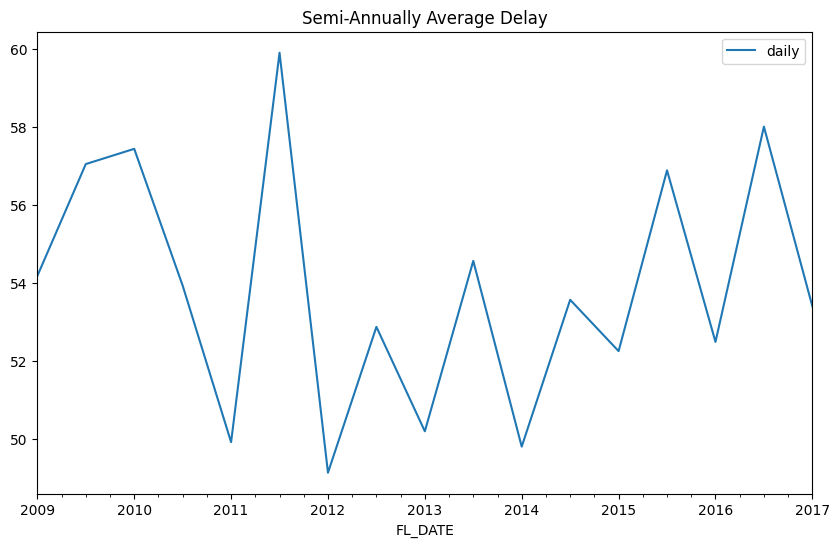

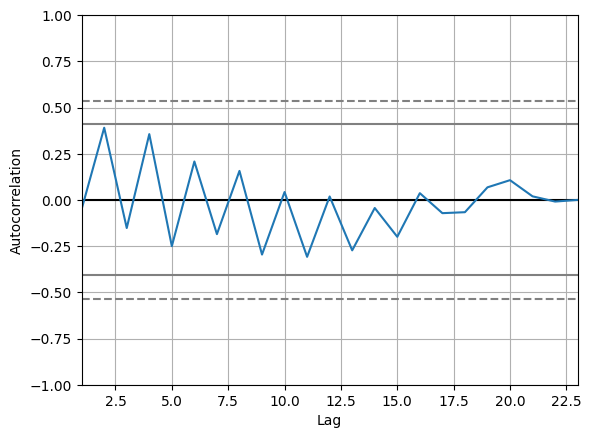

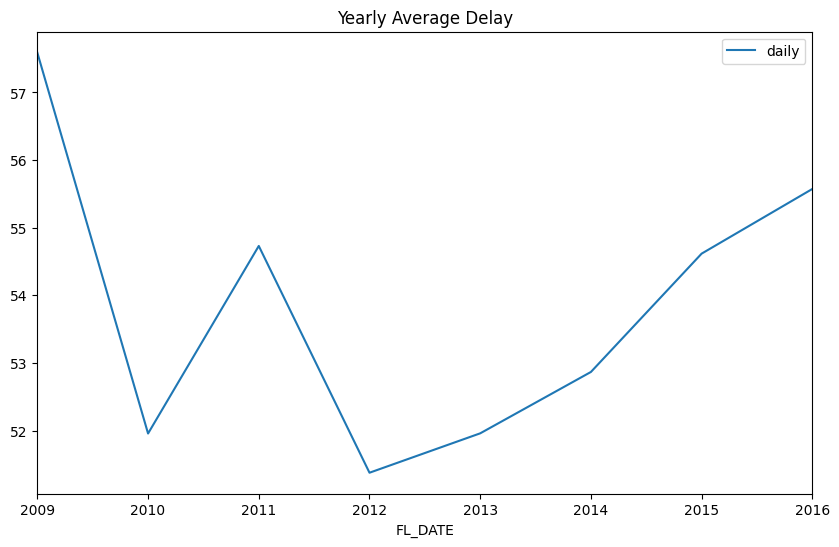

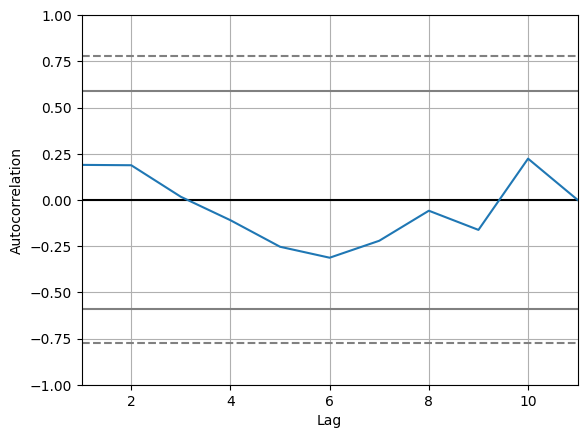

In [72]:
def plot_average_by_interval():
    
    resample_dict = {'D':'Daily', 'W':'Weekly', '2W':'FORTNIGHTLY', 'M':'Monthly', '3M':'Quarterly', '6M':'Semi-Annually', 'Y':'Yearly'}

    for _ in resample_dict:
        plt.figure(figsize=(10,6))

        train.resample(_).mean().average_delay.plot(label='daily')
        # flights_daily_mean.resample('W').mean().average_delay.plot(label='weekly')
        # flights_daily_mean.resample('M').mean().average_delay.plot(label='monthly')
        # flights_daily_mean.resample('Y').mean().average_delay.plot(label='yearly')


        plt.title(f'{resample_dict[_][0:]} Average Delay')
        plt.legend()
        plt.show()

        pd.plotting.autocorrelation_plot(df.average_delay.resample(_).mean())
        plt.show()

plot_average_by_interval()

### Function for lag plot 

In [73]:
def plot_best_lag_plot(sample, lag):

    #Plots the best correlated lag
    pd.plotting.lag_plot(train.resample(sample).mean(), lag=lag)
    #plt.ylabel(f'{sample} Lagged Values')
    #plt.title(f'{sample}lag plot');



## Pearson R Testing

### Is there a correlation?

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

In [75]:
len(train.resample('y').mean().values[0:-1])

7

In [76]:
len(train.resample('y').mean().values[1:])

7

In [96]:
# for (x, y) in zip(flattened_x, flattened_y):
#     print(x,y)

In [97]:
# for i in train.resample('m').mean().values:
#     np.array(i)
#     flattened_list = [item for sublist in nested_list for item in sublist]
#     print(i)

# Pearoson's R Testing

### Monthly Testing

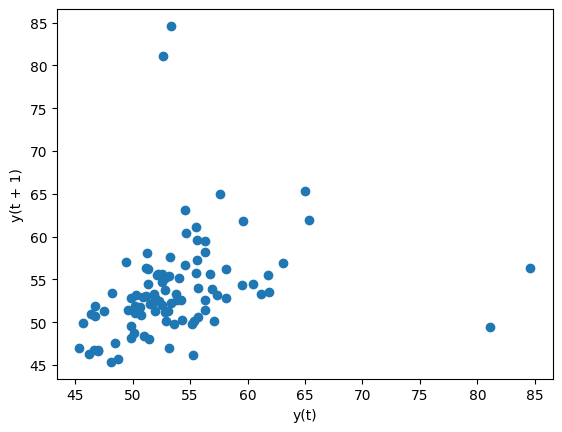

In [79]:
plot_best_lag_plot('m', 1)

In [80]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('m').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('m').mean().values[1:] for item in sublist]


In [81]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.2687687725711844, 0.00844846507139641)

### Weekly Testing

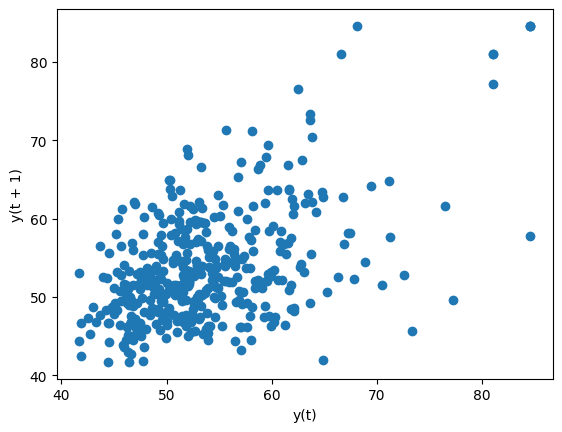

In [82]:
plot_best_lag_plot('w', 1)

In [83]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('w').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('w').mean().values[1:] for item in sublist]


In [84]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.5210999368460493, 2.0966752048412417e-30)

### 2 Week Testing

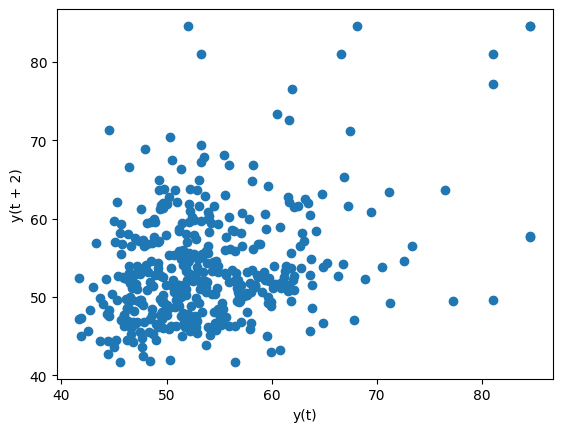

In [85]:
plot_best_lag_plot('w', 2)

In [86]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('2w').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('2w').mean().values[1:] for item in sublist]


In [87]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.5069191104760563, 4.808566274802226e-15)

### Plot the seasonal decompositions for the various time periods

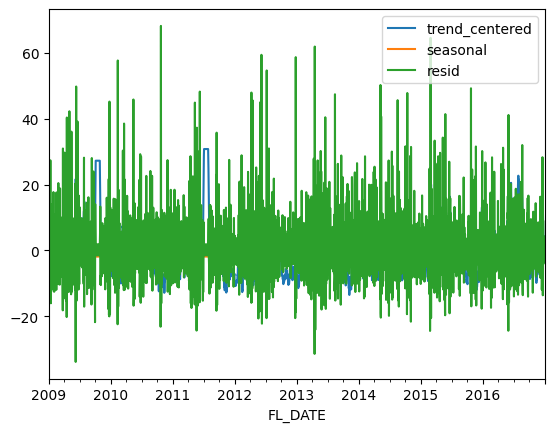

In [88]:
y = train.average_delay.resample('d').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

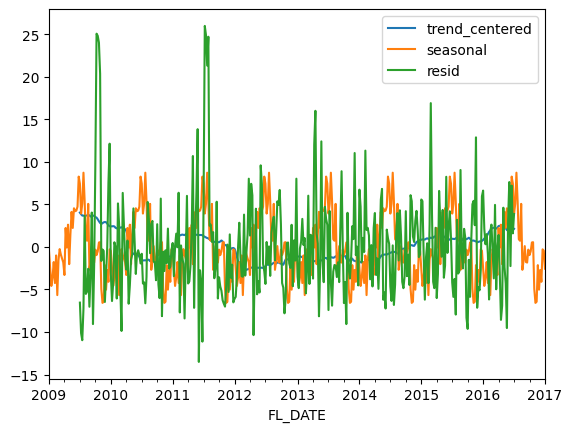

In [89]:
y = train.average_delay.resample('w').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

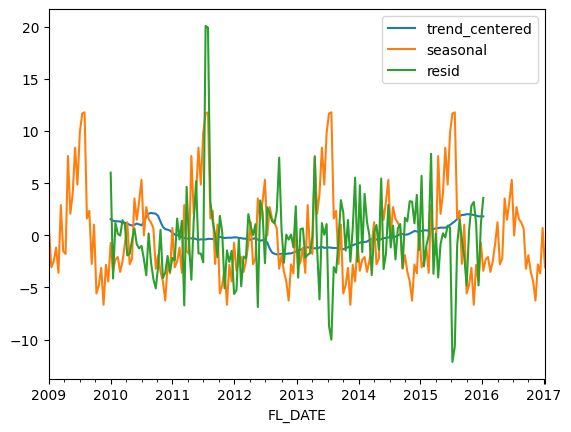

In [90]:
def seasonal_decomposition_plot(duration):
    y = train.average_delay.resample(duration).mean()

    result = sm.tsa.seasonal_decompose(y)

    decomposition = pd.DataFrame({
        'y': result.observed,
        'trend': result.trend,
        'seasonal': result.seasonal,
        'resid': result.resid
    })

    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
    decomposition[['trend_centered', 'seasonal', 'resid']].plot();
    
seasonal_decomposition_plot('2w')

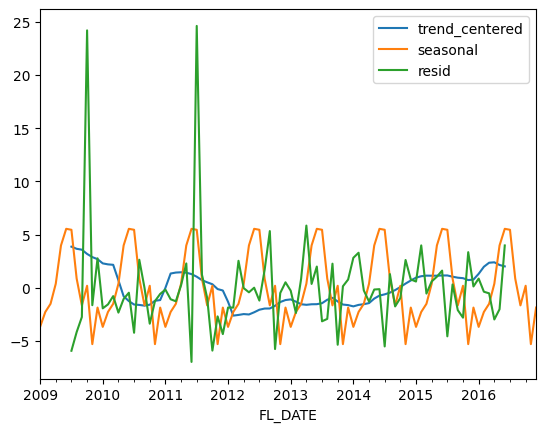

In [91]:
y = train.average_delay.resample('m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

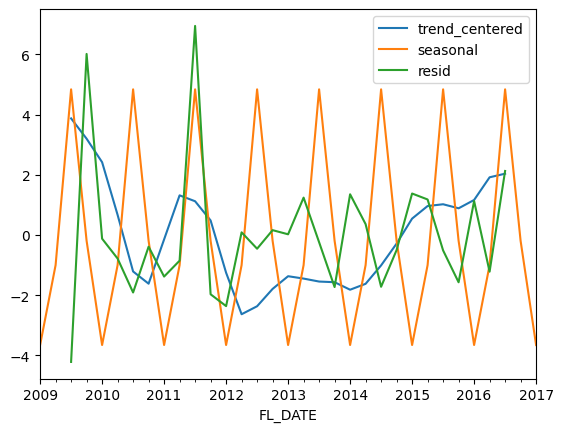

In [92]:
y = train.average_delay.resample('3m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

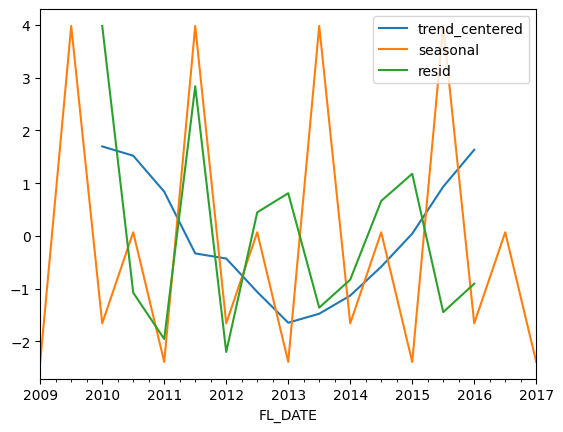

In [93]:
y = train.average_delay.resample('6m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

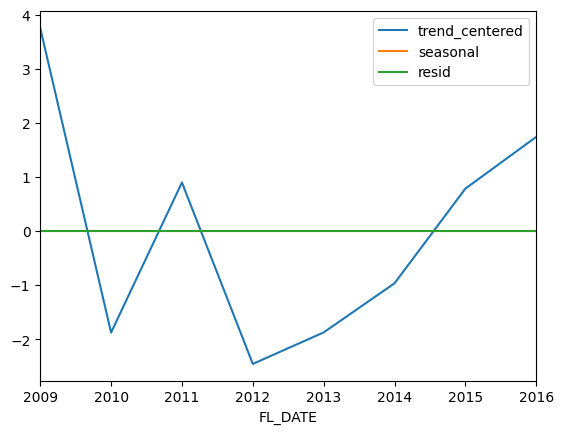

In [94]:
y = train.average_delay.resample('y').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

In [95]:
import pandas as pd

def sort_rows_highest_to_lowest(df):
    """
    Sort each row in a DataFrame from highest to lowest value.
    
    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: A new DataFrame with rows sorted.
    """
    # Use the apply method to sort each row
    sorted_df = df.apply(lambda row: sorted(row, reverse=True), axis=1)
    
    return sorted_df


